In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train_data.csv')
df=pd.DataFrame(train_data)
df.head(10)

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
5,137682,15801466,Gray,574,France,Female,34.0,2,122524.61,2,1.0,0.0,88463.63,0
6,42541,15621654,Macleod,671,France,Male,35.0,2,0.00,2,1.0,1.0,183566.85,0
7,148483,15585985,Ritchie,678,Spain,Male,32.0,2,124586.93,1,1.0,1.0,181218.37,0
8,14108,15654183,Chibueze,850,France,Female,27.0,1,0.00,1,1.0,1.0,189268.81,0
9,15670,15648005,Tsao,672,Spain,Male,33.0,2,0.00,1,1.0,1.0,182738.00,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143579 entries, 0 to 143578
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               143579 non-null  int64  
 1   CustomerId       143579 non-null  int64  
 2   Surname          143579 non-null  object 
 3   CreditScore      143579 non-null  int64  
 4   Geography        143579 non-null  object 
 5   Gender           143579 non-null  object 
 6   Age              143579 non-null  float64
 7   Tenure           143579 non-null  int64  
 8   Balance          143579 non-null  float64
 9   NumOfProducts    143579 non-null  int64  
 10  HasCrCard        143579 non-null  float64
 11  IsActiveMember   143579 non-null  float64
 12  EstimatedSalary  143579 non-null  float64
 13  Exited           143579 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 15.3+ MB


#Les variables discrètes:
- Surname  
- CreditScore      
- Geography  
- Gender         
- Tenure    
- NumOfProducts  
- HasCrCard          
- IsActiveMember   
- Exited                    


#Analyse univariée variable discrète

In [62]:
df['Exited'].value_counts()*100/len(df['Exited'])

Exited
0    78.792163
1    21.207837
Name: count, dtype: float64

In [5]:
# Nombre de personnes avec un CreditScore supérieur ou égal à 500
above_500 = df[df['CreditScore'] >= 500].shape[0]
above_500_percentage = (above_500 / df.shape[0]) * 100

# Nombre de personnes avec un CreditScore inférieur à 500
below_500 = df[df['CreditScore'] < 500].shape[0]
below_500_percentage = (below_500 / df.shape[0]) * 100

# Affichage des résultats
print(f"Nombre de personnes avec un CreditScore supérieur ou égal à 500: {above_500}, ce qui représente {above_500_percentage:.2f}%")
print(f"Nombre de personnes avec un CreditScore inférieur à 500: {below_500}, ce qui représente {below_500_percentage:.2f}%")


Nombre de personnes avec un CreditScore supérieur ou égal à 500: 139435, ce qui représente 97.11%
Nombre de personnes avec un CreditScore inférieur à 500: 4144, ce qui représente 2.89%


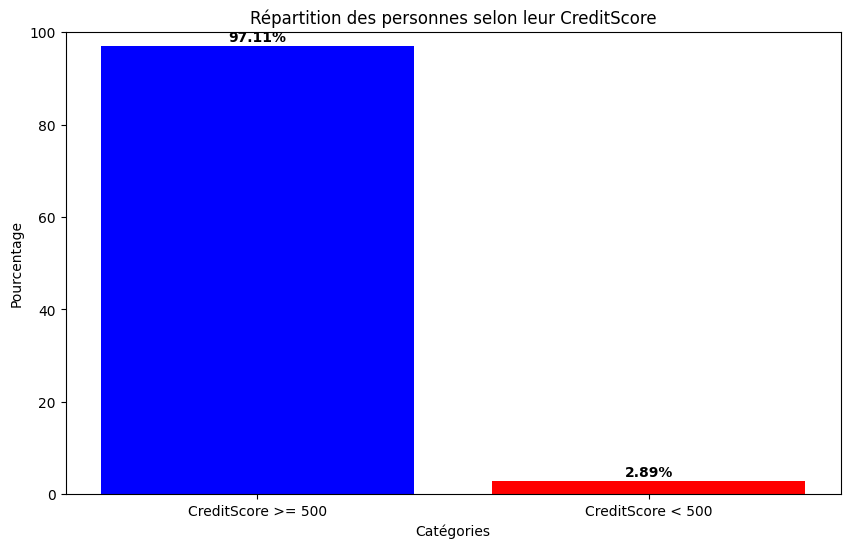

In [6]:
categories = ['CreditScore >= 500', 'CreditScore < 500']
values = [above_500_percentage, below_500_percentage]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Catégories')
plt.ylabel('Pourcentage')
plt.title('Répartition des personnes selon leur CreditScore')
plt.ylim(0, 100)

# Affichage des pourcentages sur les barres
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')

plt.show()

In [7]:
df['Geography'].value_counts()
Geography_counts = df['Geography'].value_counts(normalize=True) * 100
print(Geography_counts)

Geography
France     57.032017
Spain      22.000432
Germany    20.967551
Name: proportion, dtype: float64


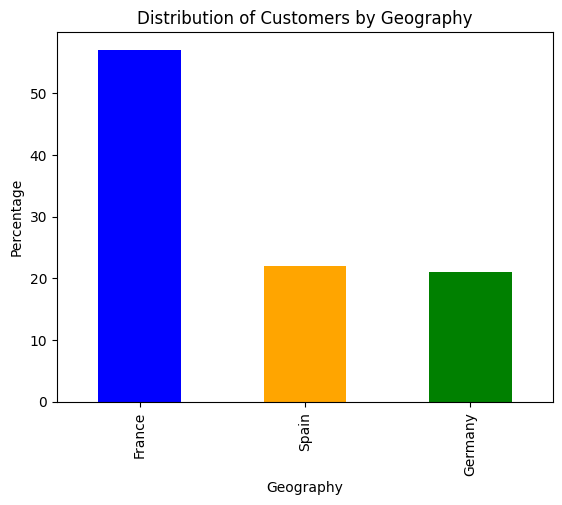

In [8]:
Geography_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribution of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Percentage')
plt.show()

In [9]:
df['Gender'].value_counts()
Gender_counts = df['Gender'].value_counts(normalize=True) * 100
print(Gender_counts)

Gender
Male      56.391255
Female    43.608745
Name: proportion, dtype: float64


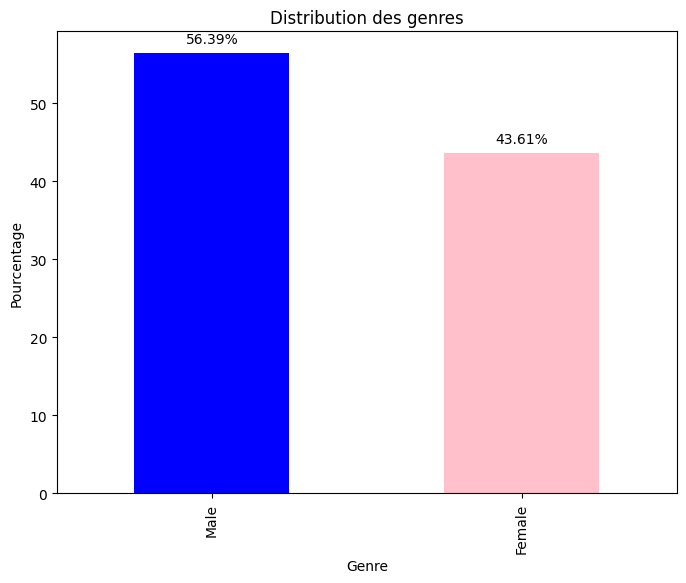

In [10]:
plt.figure(figsize=(8, 6))
ax = Gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution des genres')
plt.xlabel('Genre')
plt.ylabel('Pourcentage')

# Ajouter les pourcentages sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [11]:
df['Tenure'].value_counts()
tenure_counts = df['Tenure'].value_counts(normalize=True) * 100
print(tenure_counts)

Tenure
2     10.980714
7     10.777342
8     10.636653
4     10.626206
5     10.436067
1     10.170707
9     10.138669
3     10.087826
6      9.552929
10     3.565981
0      3.026905
Name: proportion, dtype: float64


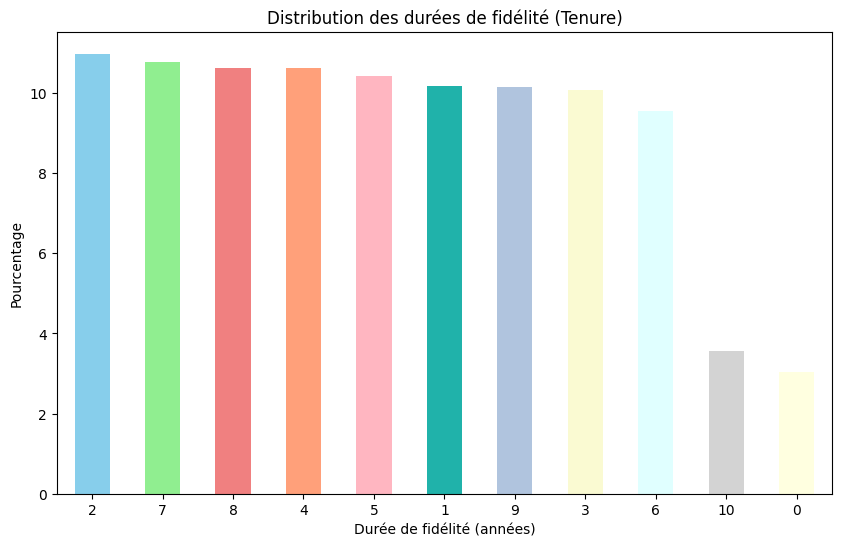

In [12]:
tenure_counts = df['Tenure'].value_counts(normalize=True) * 100
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightseagreen', 'lightsteelblue', 'lightgoldenrodyellow', 'lightcyan', 'lightgray', 'lightyellow']

plt.figure(figsize=(10, 6))
tenure_counts.plot(kind='bar', color=colors)
plt.title('Distribution des durées de fidélité (Tenure)')
plt.xlabel('Durée de fidélité (années)')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)
plt.show()

In [13]:
df['NumOfProducts'].value_counts()
NumOfProducts_counts = df['NumOfProducts'].value_counts(normalize=True) * 100
print(NumOfProducts_counts)

NumOfProducts
2    51.052731
1    46.917725
3     1.748167
4     0.281378
Name: proportion, dtype: float64


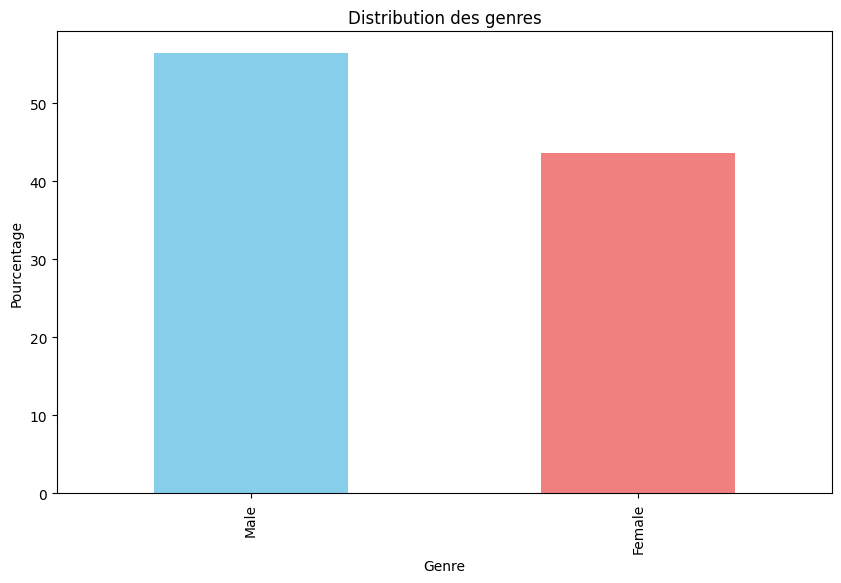

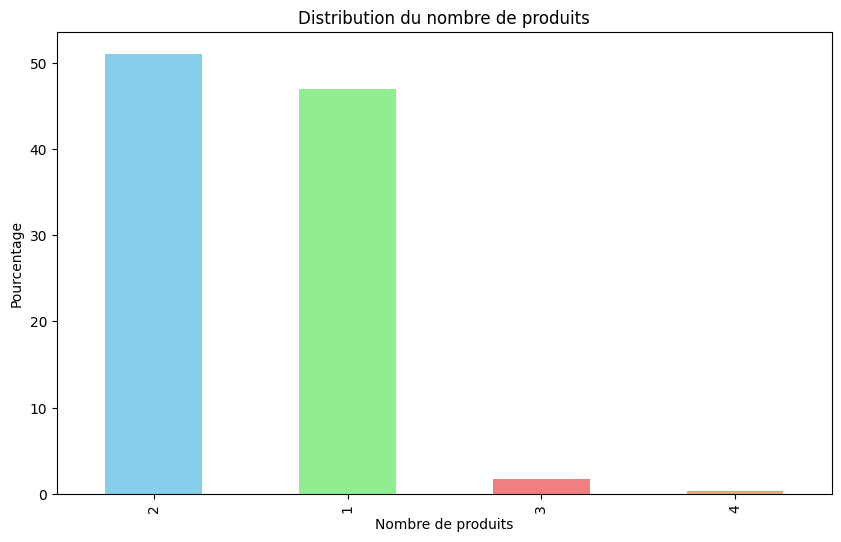

In [14]:
plt.figure(figsize=(10, 6))
Gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution des genres')
plt.xlabel('Genre')
plt.ylabel('Pourcentage')
plt.show()
# Création du barplot pour les proportions de nombre de produits
plt.figure(figsize=(10, 6))
NumOfProducts_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Distribution du nombre de produits')
plt.xlabel('Nombre de produits')
plt.ylabel('Pourcentage')


plt.show()

In [15]:
# Calcul des pourcentages pour les variables
has_cr_card = df['HasCrCard'].value_counts(normalize=True) * 100
is_active_member = df['IsActiveMember'].value_counts(normalize=True) * 100
exited = df['Exited'].value_counts(normalize=True) * 100

# Affichage des résultats
print(f"Carte de crédit : {has_cr_card[1.0]:.2f}% ont une carte, {has_cr_card[0.0]:.2f}% n'en ont pas.")
print(f"Membres actifs : {is_active_member[1.0]:.2f}% sont actifs, {is_active_member[0.0]:.2f}% ne le sont pas.")
print(f"Clients partis : {exited[1.0]:.2f}% sont partis, {exited[0.0]:.2f}% sont restés.")


Carte de crédit : 75.41% ont une carte, 24.59% n'en ont pas.
Membres actifs : 49.68% sont actifs, 50.32% ne le sont pas.
Clients partis : 21.21% sont partis, 78.79% sont restés.


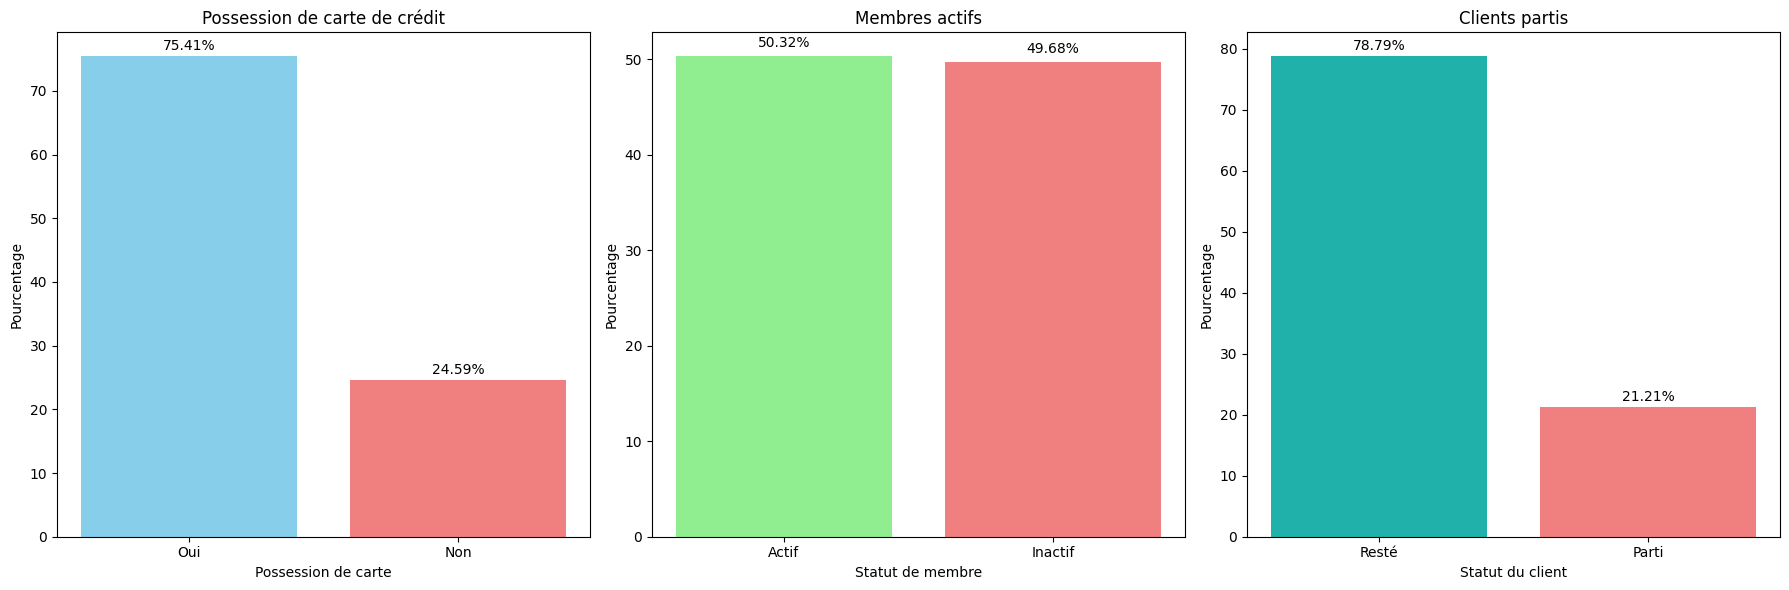

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Barplot pour HasCrCard
ax[0].bar(['Oui', 'Non'], has_cr_card, color=['skyblue', 'lightcoral'])
ax[0].set_title('Possession de carte de crédit')
ax[0].set_xlabel('Possession de carte')
ax[0].set_ylabel('Pourcentage')
for i, v in enumerate(has_cr_card):
    ax[0].text(i, v + 1, f"{v:.2f}%", ha='center')

# Barplot pour IsActiveMember
ax[1].bar(['Actif', 'Inactif'], is_active_member, color=['lightgreen', 'lightcoral'])
ax[1].set_title('Membres actifs')
ax[1].set_xlabel('Statut de membre')
ax[1].set_ylabel('Pourcentage')
for i, v in enumerate(is_active_member):
    ax[1].text(i, v + 1, f"{v:.2f}%", ha='center')

# Barplot pour Exited
ax[2].bar(['Resté', 'Parti'], exited, color=['lightseagreen', 'lightcoral'])
ax[2].set_title('Clients partis')
ax[2].set_xlabel('Statut du client')
ax[2].set_ylabel('Pourcentage')
for i, v in enumerate(exited):
    ax[2].text(i, v + 1, f"{v:.2f}%", ha='center')

plt.tight_layout()
plt.show()

#Les variables continues:
- Age
- Balance          
- EstimatedSalary

In [17]:
print(df['Age'].describe())
print(f"l'âge minimum des nos clients est de {df['Age'].min()} ans.")
print(f"50% des clients ont ou moins de {df['Age'].median()} ans.")
print(f"l'âge moyen des clients est de {df['Age'].mean():.2f} ans.")
print(f"l'âge maximum des nos clients est de {df['Age'].max()} ans.")

count    143579.000000
mean         38.144476
std           8.871711
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64
l'âge minimum des nos clients est de 18.0 ans.
50% des clients ont ou moins de 37.0 ans.
l'âge moyen des clients est de 38.14 ans.
l'âge maximum des nos clients est de 92.0 ans.


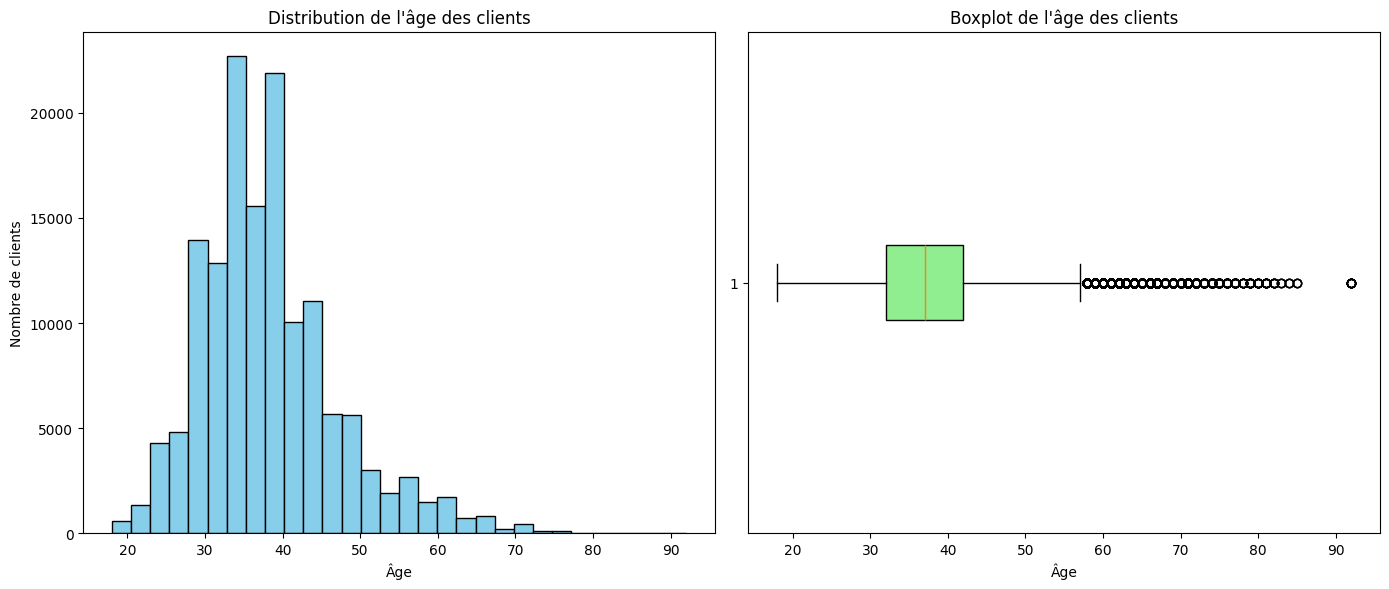

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution de l\'âge des clients')
axs[0].set_xlabel('Âge')
axs[0].set_ylabel('Nombre de clients')
axs[1].boxplot(df['Age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axs[1].set_title('Boxplot de l\'âge des clients')
axs[1].set_xlabel('Âge')
plt.tight_layout()
plt.show()

In [19]:
print(df['Balance'].describe())
print(f"Le solde minimum de nos clients est de {df['Balance'].min():.2f} euros.")
print(f"50% des clients ont un solde de {df['Balance'].median():.2f} euros.")
print(f"Le solde moyen des clients est de {df['Balance'].mean():.2f} euros.")
print(f"Le solde maximum de nos clients est de {df['Balance'].max():.2f} euros.")

count    143579.000000
mean      55533.640642
std       62822.616346
min           0.000000
25%           0.000000
50%           0.000000
75%      119948.090000
max      250898.090000
Name: Balance, dtype: float64
Le solde minimum de nos clients est de 0.00 euros.
50% des clients ont un solde de 0.00 euros.
Le solde moyen des clients est de 55533.64 euros.
Le solde maximum de nos clients est de 250898.09 euros.


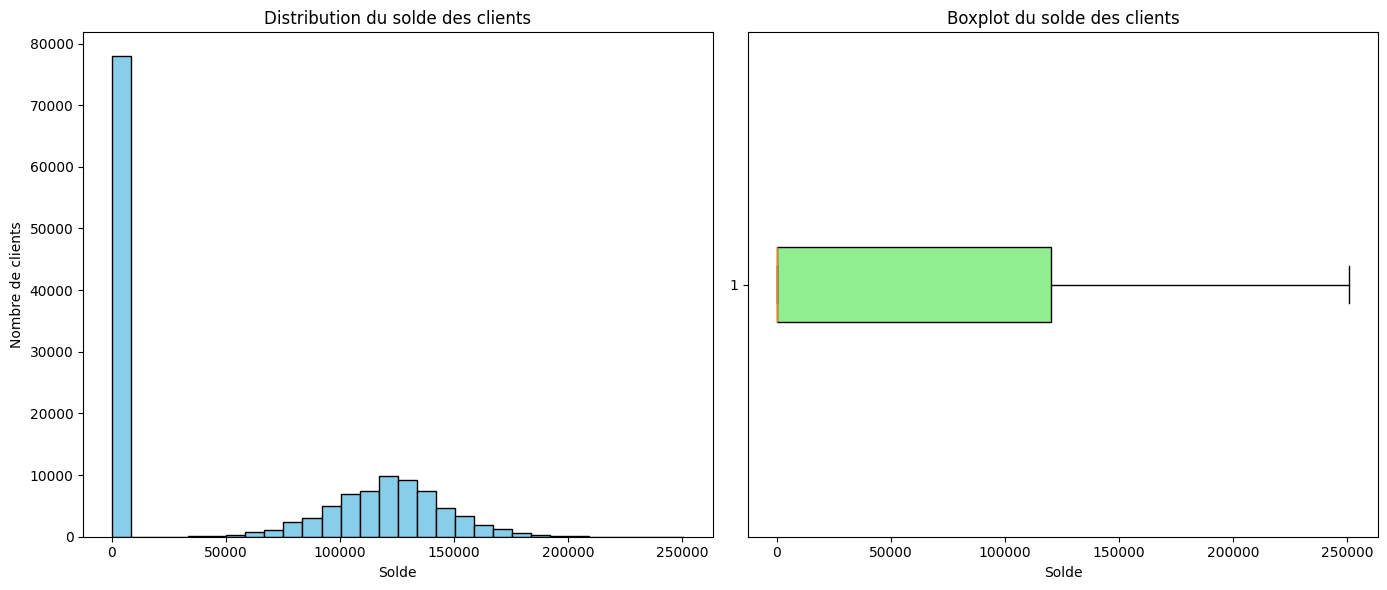

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].hist(df['Balance'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution du solde des clients')
axs[0].set_xlabel('Solde')
axs[0].set_ylabel('Nombre de clients')
axs[1].boxplot(df['Balance'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axs[1].set_title('Boxplot du solde des clients')
axs[1].set_xlabel('Solde')
plt.tight_layout()
plt.show()

In [21]:
print(df['EstimatedSalary'].describe())
print(f"Le salaire estimé minimum de nos clients est de {df['EstimatedSalary'].min():.2f} euros.")
print(f"50% des clients ont un salaire estimé de {df['EstimatedSalary'].median():.2f} euros ou moins.")
print(f"Le salaire estimé moyen des clients est de {df['EstimatedSalary'].mean():.2f} euros.")
print(f"Le salaire estimé maximum de nos clients est de {df['EstimatedSalary'].max():.2f} euros.")

count    143579.000000
mean     112530.072465
std       50301.718378
min          11.580000
25%       74580.800000
50%      117931.100000
75%      155149.685000
max      199992.480000
Name: EstimatedSalary, dtype: float64
Le salaire estimé minimum de nos clients est de 11.58 euros.
50% des clients ont un salaire estimé de 117931.10 euros ou moins.
Le salaire estimé moyen des clients est de 112530.07 euros.
Le salaire estimé maximum de nos clients est de 199992.48 euros.


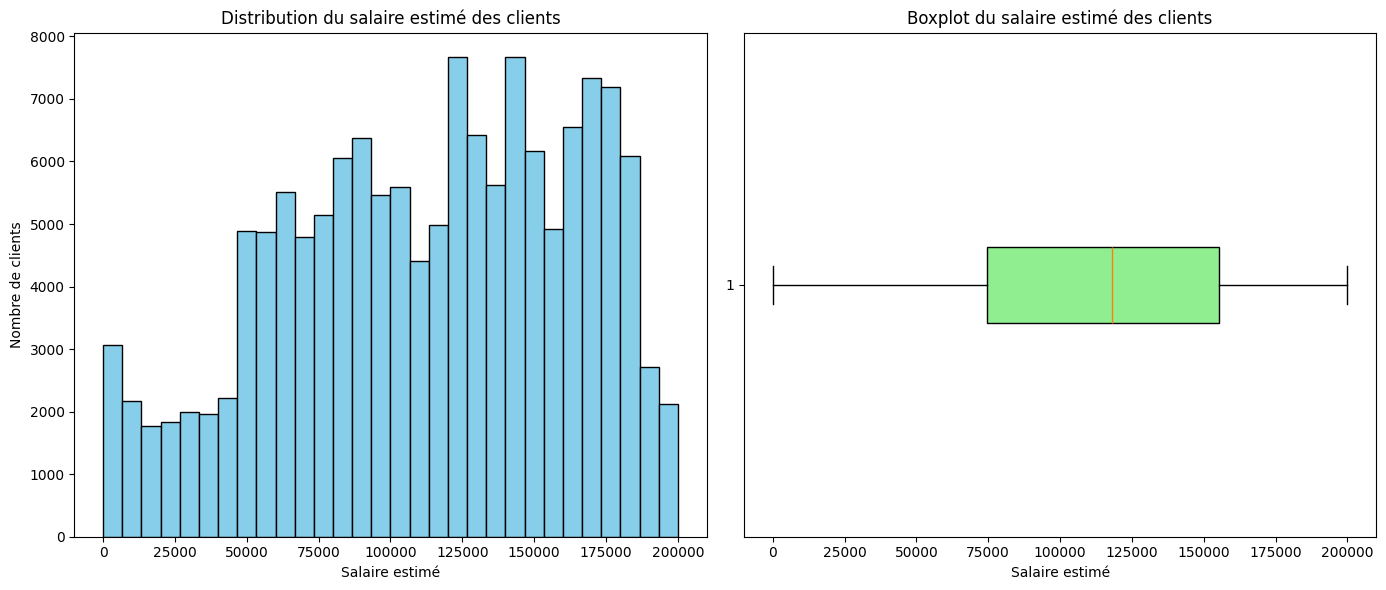

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].hist(df['EstimatedSalary'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution du salaire estimé des clients')
axs[0].set_xlabel('Salaire estimé')
axs[0].set_ylabel('Nombre de clients')
axs[1].boxplot(df['EstimatedSalary'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axs[1].set_title('Boxplot du salaire estimé des clients')
axs[1].set_xlabel('Salaire estimé')
plt.tight_layout()
plt.show()

Analyse multivariée Discrète-Discrète

In [28]:
Cross_tab_Exiited_CreditScore = pd.crosstab(df['Exited'], df['CreditScore']) 
Cross_tab_Exiited_CreditScore.head()

CreditScore,350,358,359,363,365,367,373,376,382,383,...,841,842,843,844,845,846,847,848,849,850
Exited,,,,,,,,,,,,,,,,,,,,,
0,14,0,2,4,3,8,0,5,2,2,...,97,32,8,54,48,30,40,18,56,1793
1,5,1,0,0,1,0,1,2,0,0,...,28,17,6,13,6,8,5,8,17,412


In [45]:
Cross_tab_Exiited_Geography = pd.crosstab(df['Exited'], df['Geography'])
Cross_tab_Exiited_Geography.head()
print(Cross_tab_Exiited_Geography.head())
print("La France est le pays avec le plus grand nombre de clients ayant quitté la banque, mais tenant compte du nombre total de clients par pays le taux de départ est plus faible en France que dans les autres pays.")
print("L'Allemagne est le pays avec le taux de départ le plus élevé, le nombre total de clients est également plus faible que dans les autres pays.")
print("L'Espagne est le pays avec le taux de départ le plus bas, mais le nombre total de clients est également plus faible que dans les autres pays.")

Geography  France  Germany  Spain
Exited                           
0           68338    18657  26134
1           13548    11448   5454
La France est le pays avec le plus grand nombre de clients ayant quitté la banque, mais tenant compte du nombre total de clients par pays le taux de départ est plus faible en France que dans les autres pays.
L'Allemagne est le pays avec le taux de départ le plus élevé, le nombre total de clients est également plus faible que dans les autres pays.
L'Espagne est le pays avec le taux de départ le plus bas, mais le nombre total de clients est également plus faible que dans les autres pays.


In [46]:
Cross_tab_Exiited_Gender = pd.crosstab(df['Exited'], df['Gender'])
Cross_tab_Exiited_Gender.head()
print(Cross_tab_Exiited_Gender.head())
print("Le taux de départ des femmes est plus élevé que celui des hommes.")
print("Le nombre total de clients femmes est plus faible que hommes.")

Gender  Female   Male
Exited               
0        45038  68091
1        17575  12875
Le taux de départ des femmes est plus élevé que celui des hommes.
Le nombre total de clients femmes est plus faible que hommes.


In [ ]:
Cross_tab_Exiited_Tenure = pd.crosstab(df['Exited'], df['Tenure'])
Cross_tab_Exiited_Tenure.head()
print(Cross_tab_Exiited_Tenure.head())

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,3234,11281,12692,11171,11787,11685,11010,12560,12221,11466,4022
1,1112,3322,3074,3313,3470,3299,2706,2914,3051,3091,1098


In [49]:
Cross_tab_Exiited_NumOfProducts = pd.crosstab(df['Exited'], df['NumOfProducts'])
Cross_tab_Exiited_NumOfProducts

NumOfProducts,1,2,3,4
Exited,,,,
0,43905,68879,292,53
1,23459,4422,2218,351


In [41]:
Cross_tab_Exiited_HasCrCard = pd.crosstab(df['Exited'], df['HasCrCard'])
Cross_tab_Exiited_HasCrCard.head()
Cross_tab_Exiited_HasCrCard

HasCrCard,0.0,1.0
Exited,,
0,27246,85883
1,8059,22391


In [47]:
Cross_tab_Exiited_IsActiveMember = pd.crosstab(df['Exited'], df['IsActiveMember'])
Cross_tab_Exiited_IsActiveMember
Cross_tab_Exiited_IsActiveMember

IsActiveMember,0.0,1.0
Exited,,
0,50742,62387
1,21507,8943


Analyse multivariée Discrète-Continue

In [50]:
df.groupby("Exited")["Age"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,36.58,8.17,18.0,31.0,36.0,40.0,92.0
1,30450.0,43.94,8.98,18.0,38.0,44.0,50.0,92.0


Text(0.5, 0, 'Statut')

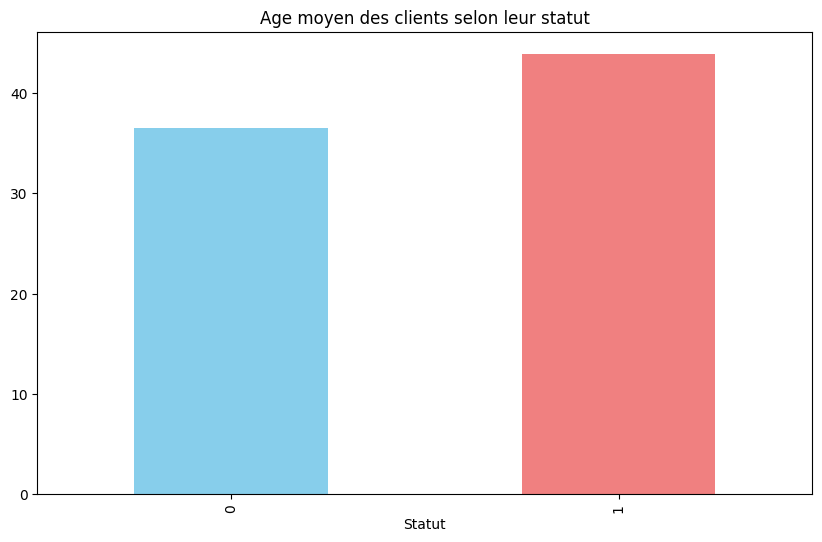

In [54]:
df.groupby("Exited")["Age"].mean().round(2).plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Age moyen des clients selon leur statut')
plt.xlabel('Statut')

In [55]:
df.groupby("Exited")["Balance"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,51274.23,62196.89,0.0,0.0,0.00,116811.12,250898.09
1,30450.0,71358.36,62606.86,0.0,0.0,98959.19,125521.18,238387.56


Text(0.5, 0, 'Statut')

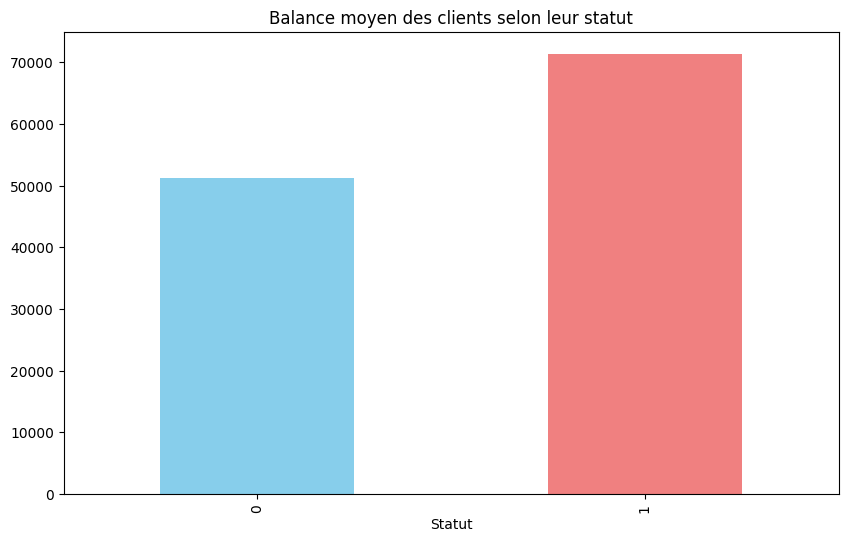

In [56]:
df.groupby("Exited")["Balance"].mean().round(2).plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Balance moyen des clients selon leur statut')
plt.xlabel('Statut')

In [57]:
df.groupby("Exited")["EstimatedSalary"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,113129.0,112024.08,50228.17,11.58,74287.53,116971.05,153727.32,199992.48
1,30450.0,114409.94,50530.50,11.58,74898.80,120893.77,158830.36,199992.48


Text(0.5, 0, 'Statut')

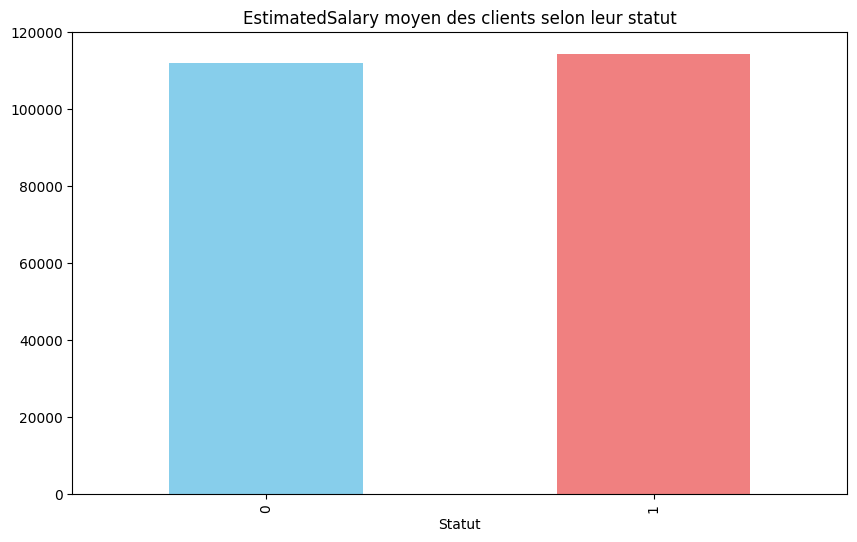

In [58]:
df.groupby("Exited")["EstimatedSalary"].mean().round(2).plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('EstimatedSalary moyen des clients selon leur statut')
plt.xlabel('Statut')

Analyse multivariée variables Continue-Continue

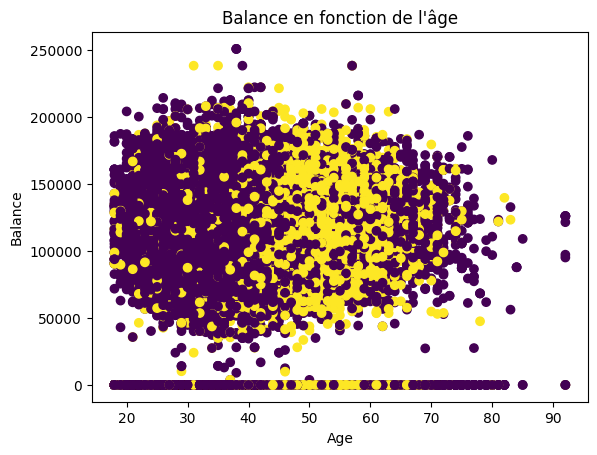

In [71]:
plt.scatter(df['Age'], df['Balance'], c=df['Exited'])
plt.title("Balance en fonction de l'âge")
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

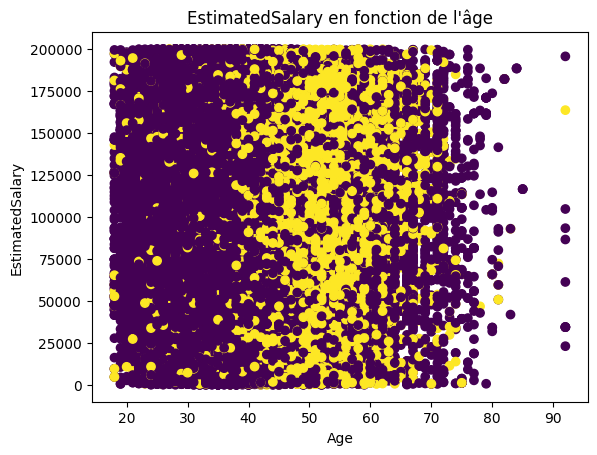

In [72]:
plt.scatter(df['Age'], df['EstimatedSalary'], c=df['Exited'])
plt.title("EstimatedSalary en fonction de l'âge")  
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

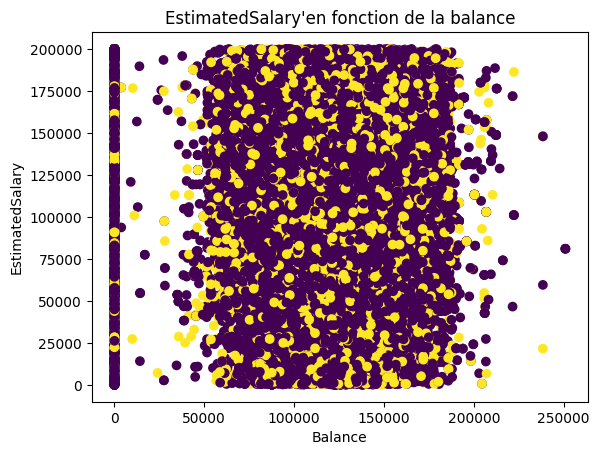

In [70]:
plt.scatter(df['Balance'], df['EstimatedSalary'], c=df['Exited'])
plt.title("EstimatedSalary'en fonction de la balance")
plt.xlabel('Balance')
plt.ylabel('EstimatedSalary')
plt.show()